In [ ]:
"""
IMPORTANT:
This project is designed to run exclusively on Google Colab.

It relies on Google Drive being mounted at:
    /content/drive/MyDrive/

Local execution is not supported.
"""


**MOUNTS DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mounts Google Drive into the Colab environment to access project files

# Changes the current working directory to the NeuroScape project folder in Google Drive
%cd /content/drive/MyDrive/NeuroScape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Trabalhos/TJ/NeuroScape


**INSTALLING LIBRARIES**

In [ ]:
!apt-get update
!apt-get install -y google-chrome-stable

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://cli.github.com/packages stable/main amd64 Packages [347 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,327 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,275 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pac

In [ ]:
!pip uninstall -y kaleido
!pip install kaleido==0.2.1
!pip install -U plotly

Found existing installation: kaleido 0.2.1
Uninstalling kaleido-0.2.1:
  Successfully uninstalled kaleido-0.2.1
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)


**DEFINING FUNCTIONS**

In [ ]:
import importlib.util
print(importlib.util.find_spec("kaleido"))


ModuleSpec(name='kaleido', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7b9938131fa0>, origin='/usr/local/lib/python3.12/dist-packages/kaleido/__init__.py', submodule_search_locations=['/usr/local/lib/python3.12/dist-packages/kaleido'])


In [ ]:
# Add the parent directory of the current working directory to the Python path at runtime.
# In order to import modules from the src directory.
import os
import sys
from dotenv import load_dotenv, find_dotenv

sys.path.append('/content/drive/MyDrive/NeuroScape/src')

load_dotenv("/content/drive/MyDrive/NeuroScape/keys.env")

BASEPATH = os.environ["BASEPATH"]

In [ ]:
import tomllib
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import stats
from src.utils.plotting import convert_size

sns.set_context("paper")

In [ ]:
def parse_directories():
    """
    Parse the directories from the configuration file.
    Returns:
    - directories: dict
    """
    with open('/content/drive/MyDrive/NeuroScape/config/directories.toml', 'rb') as f:
        configurations = tomllib.load(f)

    return configurations

In [ ]:
directories = parse_directories()
csv_path = os.path.join('/content/drive/MyDrive/NeuroScape/output/tratados/neuroscience')
cluster_file = os.path.join(csv_path, "clusters_defined_distinguished_questions_trends_assessed_density.csv")
cluster_df = pd.read_csv(cluster_file)
dimensions_file = os.path.join(BASEPATH, csv_path, "dimensions.csv")
dimensions_df = pd.read_csv(dimensions_file)

# drop the Cluster ID column
dimensions_df.drop(columns=['Cluster ID'], inplace=True)

figure_path = os.path.join(BASEPATH, directories['internal']['manuscript']['figures'], 'Figure_03')
os.makedirs(figure_path, exist_ok=True)

table_path = os.path.join(BASEPATH, directories['internal']['manuscript']['tables'])
os.makedirs(table_path, exist_ok=True)

In [ ]:
# Reduce cluster_df to only dimension specific columns and save as supplementary table
"""
Dimension 1 - Appliedness: The research primarily focuses on fundamental mechanisms of neuropathic pain involving spinal cord and glial contributions, with some translational aspects suggesting potential therapeutic targets.
Dimension 2 - Modality: Primarily involved with somatosensory modalities, considering mechanical, thermal, and chemical pain responses.
Dimension 3 - Spatiotemporal Scale: Explores molecular and cellular changes in dorsal root ganglia and spinal cord, often focusing on days to weeks post-injury.
Dimension 4 - Cognitive Complexity: Investigates low-level processes such as sensory processing and nociceptive signal modulation.
Dimension 5 - Species: Research is predominantly conducted in rodents, specifically rats and mice.
Dimension 6 - Theory Engagement: Predominantly hypothesis-driven with specific focus on molecular pathways and receptors involved in pain mechanisms.
Dimension 7 - Theory Scope: Focuses on specific mechanisms of pathophysiology involving neuroinflammation and neural plasticity, with frameworks including neurotrophic signaling and modulation of neural excitability.
Dimension 8 - Methodological Approach: Utilizes a range of experimental approaches, including behavioral pain assays, immunohistochemistry, RT-PCR, Western blot, pharmacological interventions, and electrophysiological recordings.
Dimension 9 - Interdisciplinarity: Interdisciplinary aspects involving neurobiology, pharmacology, and pain medicine, aiming to bridge molecular findings with potential clinical applications.
"""

keys = ['Dimension 1 - Appliedness', 'Dimension 2 - Modality', 'Dimension 3 - Spatiotemporal Scale', 'Dimension 4 - Cognitive Complexity', 'Dimension 5 - Species', 'Dimension 6 - Theory Engagement', 'Dimension 7 - Theory Scope', 'Dimension 8 - Methodological Approach', 'Dimension 9 - Interdisciplinarity']

cluster_dimensions_dict = {key.split(' - ')[1]: [] for key in keys}

cluster_dimensions_dict['Cluster ID'] = []

for row in cluster_df.iterrows():
    cluster = row[1]
    cluster_dimensions_dict['Cluster ID'].append(cluster['Cluster ID'])

    for key in keys:
        new_key = key.split(' - ')[1]
        all_text = cluster['Dimensions']
        key_text = all_text.split(key)[1].split(': ')[1].split('\n')[0]
        cluster_dimensions_dict[new_key].append(key_text)

cluster_dimensions_df = pd.DataFrame(cluster_dimensions_dict)

# reorder to make CLuster ID first column in dimensions_df and trends_df
colums = cluster_dimensions_df.columns.tolist()
colums.remove('Cluster ID')
cluster_dimensions_df = cluster_dimensions_df[['Cluster ID'] + colums]

cluster_dimensions_df.to_excel(os.path.join(table_path, 'supplementary_table_03.xlsx'), index=False)

**Figure 2 Panels**

In [ ]:
# Define the panel size (width, height) in centimeters
figure_size = [178, 178]

# Convert the panel size to inches
figure_size_inch = convert_size(*figure_size)

# Define the font sizes
fontsize_text = 6
fontsize_ticks = 5

# Define step size for x-axis
num_clusters = 175
step = 10  # Ensure at least step=1

In [ ]:
# Panel A Treemap of the dimensions of neuroscience research
all_dimensions = {'Dimension': [], 'Category': [], 'Count': []}

# Get the count of all dimensions and categories
for dimension_category in dimensions_df.columns:
    category_counts = dimensions_df[dimension_category].sum()
    dimension, category = dimension_category.split('_')
    all_dimensions['Dimension'].append(dimension)
    all_dimensions['Category'].append(category)
    all_dimensions['Count'].append(category_counts)

all_dimensions_df = pd.DataFrame(all_dimensions)
# Get a colorblind friendly palette with 10 colors
palette = sns.color_palette("dark", 10)

# Convert RGB tuples to hex strings
palette_hex = [mcolors.to_hex(color) for color in palette]

# Define color mapping for dimensions
color_map = {
    'Appliedness': palette_hex[0],
    'Methodological Approach': palette_hex[1],
    'Species': palette_hex[2],
    'Spatial Scale': palette_hex[3],
    'Temporal Scale': palette_hex[4],
    'Modality': palette_hex[5],
    'Cognitive Complexity': palette_hex[6],
    'Theory Engagement': palette_hex[7],
    'Theory Scope': palette_hex[8],
    'Interdisciplinarity': palette_hex[9]
}

fig = px.treemap(
    all_dimensions_df,
    path=['Dimension', 'Category'],
    values='Count',
    color='Dimension',
    color_discrete_map=color_map,
    title='Treemap of Neuroscience Research Dimensions',
    hover_data=['Count'],
    labels={'Count': 'Number of Clusters'}
)

# Update the label color
fig.update_traces(textfont_color='white')

# Update layout for better readability
fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    font=dict(size=18),
)

# Remove title
fig.update_layout(title_text="")

# Save the figure
fig.write_image(os.path.join(figure_path, 'panel_a.svg'), width=1800, height=900)

/tmp/ipython-input-873227765.py:57: DeprecationWarning:


Support for Kaleido versions less than 1.0.0 is deprecated and will be removed after September 2025.
Please upgrade Kaleido to version 1.0.0 or greater (`pip install 'kaleido>=1.0.0'` or `pip install 'plotly[kaleido]'`).




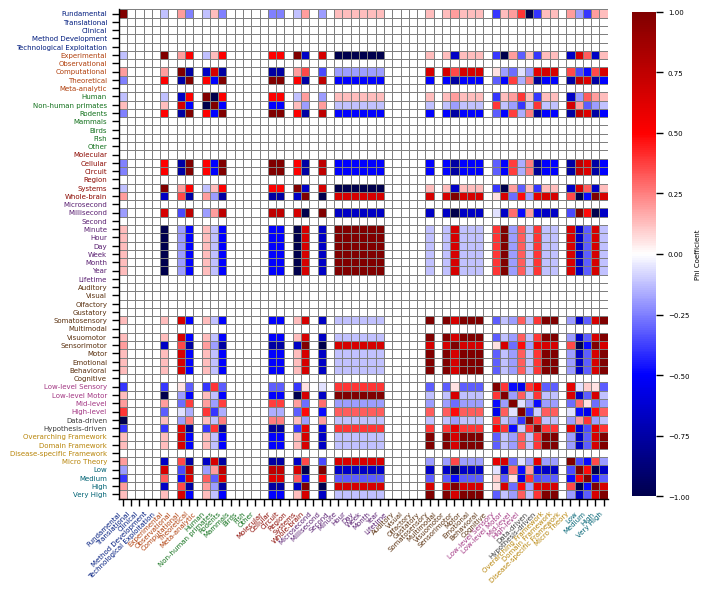

In [ ]:
# Panel B Heatmap of the phi coefficient between all category pairs of spatial and temporal scales for all dimensions

# Define the colorbar keyword arguments
cbar_kws = {
    'label': 'Phi Coefficient',
    'shrink': 0.7,
    'aspect': 20,
    'pad': 0.05
}

# Sort dimensions_df by the following dimension order: Appliedness, Methodological Approach, Species, Spatial Scale, Temporal Scale, Modality, Cognitive Complexity, Theory Engagement, Theory Scope, and Interdisciplinarity (not alphabetical)
item_order = ['Appliedness', 'Methodological Approach', 'Species', 'Spatial Scale', 'Temporal Scale', 'Modality', 'Cognitive Complexity', 'Theory Engagement', 'Theory Scope', 'Interdisciplinarity']
new_columns = sorted(dimensions_df.columns, key=lambda x: item_order.index(x.split('_')[0]))
dimensions_df = dimensions_df[new_columns]

# Compute the Phi coefficient matrix for all dimensions
all_dimensions_phi = dimensions_df.corr()

# Extract original labels
original_labels = all_dimensions_phi.columns

# Clean labels by removing the dimension prefix
clean_labels = [label.split('_', 1)[1] for label in original_labels]

# Determine colors based on category type
label_types = [label.split('_', 1)[0] for label in original_labels]
label_colors = [color_map[label_type] for label_type in label_types]
# Initialize the matplotlib figure with constrained_layout to avoid overlaps
plt.figure(figsize=figure_size_inch, constrained_layout=True)

# Plot the heatmap
ax = sns.heatmap(
    all_dimensions_phi,
    cmap='seismic',
    annot=False,
    square=True,
    vmin=-1,
    vmax=1,
    cbar_kws=cbar_kws,
    linewidths=0.5,
    linecolor='gray'
)

# Ensure every cell has a tick and label
ax.set_xticks([i + 0.5 for i in range(len(clean_labels))])
ax.set_yticks([i + 0.5 for i in range(len(clean_labels))])

# Set the tick labels to the cleaned labels
ax.set_xticklabels(clean_labels, fontsize=fontsize_ticks, rotation=45, ha='right')
ax.set_yticklabels(clean_labels, fontsize=fontsize_ticks, rotation=0)

# Apply colors to the tick labels based on their category type
for tick_label, color in zip(ax.get_xticklabels(), label_colors):
    tick_label.set_color(color)

for tick_label, color in zip(ax.get_yticklabels(), label_colors):
    tick_label.set_color(color)

# Remove the top and right spines for a cleaner look
sns.despine(ax=ax)

# Access the colorbar from the heatmap
cbar = ax.collections[0].colorbar

# Set the colorbar label font size
cbar.ax.set_ylabel('Phi Coefficient', fontsize=fontsize_ticks)

# Set the colorbar tick label font size
cbar.ax.tick_params(labelsize=fontsize_ticks)

# Save the heatmap as an SVG file for high quality
plt.savefig(os.path.join(figure_path, 'panel_b.svg'), format='svg', bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
t_values = all_dimensions_phi.values * (num_clusters - 2) ** 0.5 / (1 - all_dimensions_phi.values ** 2) ** 0.5

p_values = 2 * (1 - stats.t.cdf(abs(t_values), num_clusters - 1))

#correct for multiple comparisons using bonferroni (ignoring the diagonal)
num_categories = len(clean_labels)
possible_comparisons = num_categories * (num_categories - 1) / 2
p_values_corrected = p_values * possible_comparisons

significant = p_values_corrected < 0.05

/tmp/ipython-input-896081203.py:1: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipython-input-896081203.py:1: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Create a set to store unique pairs of significant correlations
unique_significant_pairs = set()
corresponding_p_values = []
corresponding_t_values = []

# Iterate through the significant matrix to find significant correlations
for i in range(significant.shape[0]):
    for j in range(i + 1, significant.shape[1]):
        if significant[i, j]:
            pair = (original_labels[i], original_labels[j])
            unique_significant_pairs.add(pair)

# Get the corresponding p-values and t-values for the significant pairs
for pair in unique_significant_pairs:
    i_index = original_labels.get_loc(pair[0])
    j_index = original_labels.get_loc(pair[1])
    corresponding_p_values.append(p_values_corrected[i_index, j_index])
    corresponding_t_values.append(t_values[i_index, j_index])

In [ ]:
dimension_pair = ('Modality', 'Cognitive Complexity')

degree_of_freedom = num_clusters - 2


print(f'Within {dimension_pair[0]}:')
for i, pair in enumerate(unique_significant_pairs):
    # Are both items in the pair significant relatd to Scale?
    if dimension_pair[0] in pair[0] and dimension_pair[0] in pair[1]:
        print(f"{pair[0].split('_')[1]} - {pair[1].split('_')[1]}, {all_dimensions_phi.loc[pair[0], pair[1]]}, p={corresponding_p_values[i]}, t={corresponding_t_values[i]}")
print('-----------------')

print(f'Within {dimension_pair[1]}:')
for i, pair in enumerate(unique_significant_pairs):
    # Are both items in the pair significant relatd to Scale?
    if dimension_pair[1] in pair[0] and dimension_pair[1] in pair[1]:
        print(f"{pair[0].split('_')[1]} - {pair[1].split('_')[1]}, {all_dimensions_phi.loc[pair[0], pair[1]]}, p={corresponding_p_values[i]}, t={corresponding_t_values[i]}")
print('-----------------')

print(f'Between {dimension_pair[0]} and {dimension_pair[1]}:')
for i, pair in enumerate(unique_significant_pairs):
    # Are both items in the pair significant relatd to Scale?
    if dimension_pair[0] in pair[0] and dimension_pair[1] in pair[1]:
        print(f"{pair[0].split('_')[1]} - {pair[1].split('_')[1]}, {all_dimensions_phi.loc[pair[0], pair[1]]}, p={corresponding_p_values[i]}, t={corresponding_t_values[i]}")
    elif dimension_pair[1] in pair[0] and dimension_pair[0] in pair[1]:
        print(f"{pair[0].split('_')[1]} - {pair[1].split('_')[1]}, {all_dimensions_phi.loc[pair[0], pair[1]]}, p={corresponding_p_values[i]}, t={corresponding_t_values[i]}")

Within Modality:
Sensorimotor - Emotional, 0.6614378277661477, p=0.0, t=11.599808427536878
Visuomotor - Motor, 1.0, p=0.0, t=inf
Visuomotor - Emotional, 1.0, p=0.0, t=inf
Somatosensory - Motor, 1.0, p=0.0, t=inf
Somatosensory - Emotional, 1.0, p=0.0, t=inf
Motor - Behavioral, 1.0, p=0.0, t=inf
Emotional - Behavioral, 1.0, p=0.0, t=inf
Sensorimotor - Behavioral, 0.6614378277661477, p=0.0, t=11.599808427536878
Visuomotor - Sensorimotor, 0.6614378277661477, p=0.0, t=11.599808427536878
Somatosensory - Sensorimotor, 0.6614378277661477, p=0.0, t=11.599808427536878
Visuomotor - Behavioral, 1.0, p=0.0, t=inf
Somatosensory - Behavioral, 1.0, p=0.0, t=inf
Motor - Emotional, 1.0, p=0.0, t=inf
Somatosensory - Visuomotor, 1.0, p=0.0, t=inf
Sensorimotor - Motor, 0.6614378277661477, p=0.0, t=11.599808427536878
-----------------
Within Cognitive Complexity:
Low-level Sensory - Low-level Motor, 0.39528470752104744, p=0.00010482719251792005, t=5.6601269453111245
Low-level Motor - High-level, 0.316227766